# Clustering Algorithms Problem 1

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### Data Description:
- Murder - Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - Urban population in different places of United States
- Rape - Rape rate in different places of United States

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
2. Feature analysis
    - understand all features involeved.
    - list out features that needs to be considered in the model.
3. Standardize/Normalize the data
    - Use necessary scaler and standardize/normalize the data.
4. K-Means Clustering
    - Determine the hyperparameter via elbow graph.
    - build K-means algorithm.
    - get cluster.labels_
    - try out visulalizations to understand the clusters better.
5. Heirarchial Agglomerative Clustering
    - identify the hyperparementer (number of clusters).
    - make dentogram of model and specify the linkage.
    - perform agglomerative clustering.
    - get cluster.labels_
    - try out visulalizations to understand the clusters better.
6. DBSCAN Clustering
    - Identify suitable epsilon and min pts values.
    - check labeling of points(core,border,noise pts).
    - try out visulalizations to understand the clusters better.
7. Compare the models and visualisations with each other

8. Conclusion



## Import New Dataset



In [8]:
#load the libraries
import pandas as pd
%matplotlib inline
import numpy as np
import pandas_profiling as pp
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
raw_data = pd.read_csv("C:/Users/Assignment/7_clustering_alg/7Q1/crime_data.csv")
raw_data.rename(columns={'Unnamed: 0':'city'}, inplace=True)
raw_data.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
raw_data.info()
#There are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
raw_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
#EDA_report= pp.ProfileReport(raq_data)
#EDA_report.to_file(output_file='crime_stats.html') 

<AxesSubplot:>

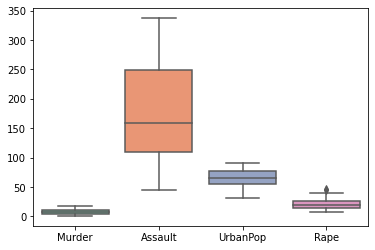

In [13]:
sns.boxplot(data=raw_data, orient="v", palette="Set2") 
#some outliers in the case of rape but nothing too drastic.

## Feature Analysis

All features in the dataset can be used in model building. All values are numerical and no additional dummy variable creation is required.
- Murder has the lower range in the crime data whereas assault has the highest range.
- There is a dependence on population but the area with highest population (91) has average crime results.
- Most data is very specific to the particular city.

## Standardizing the Data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data.iloc[:,1:])

## Normalize the Data


In [15]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = raw_data.iloc[:,1:]

norm_scaler = MinMaxScaler(feature_range=(0,1))
normscaled = norm_scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(normscaled[:5])


[[0.75 0.65 0.44 0.36]
 [0.55 0.75 0.27 0.96]
 [0.44 0.85 0.81 0.61]
 [0.48 0.5  0.31 0.32]
 [0.49 0.79 1.   0.86]]


## K-Means Clustering

#### Finding optimum number of clusters.

C:\Users\sanju\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


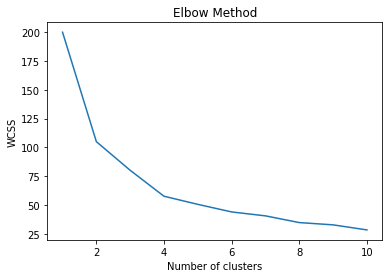

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Number of clusters(optimum) = 4

#### Building Clustering Algorithm

In [17]:
clusters_kmeans = KMeans(4, random_state=5)
clusters_kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=5)

#### Get Clusters.labels_

In [18]:
clusters_kmeans.labels_

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

In [19]:
#Assigning clusters to the datset
#Assign clusters to the data set
data_kmeans = raw_data.copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_

In [20]:
#cluster_centers values. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
clusters_kmeans.cluster_centers_

array([[-0.97, -1.12, -0.94, -0.98],
       [ 1.43,  0.88, -0.82,  0.02],
       [-0.49, -0.39,  0.58, -0.26],
       [ 0.7 ,  1.05,  0.73,  1.29]])

#### Model Evaluation & Visualisation

In [21]:
data_kmeans.groupby('clusters_kmeans').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters_kmeans,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,5.656250,138.875000,73.875000,18.781250
3,10.815385,257.384615,76.000000,33.192308


In [22]:
data_kmeans.head()

,city,Murder,Assault,UrbanPop,Rape,clusters_kmeans
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [23]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

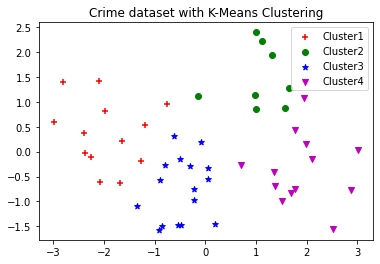

In [24]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if data_kmeans.clusters_kmeans[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif data_kmeans.clusters_kmeans[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif data_kmeans.clusters_kmeans[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif data_kmeans.clusters_kmeans[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with K-Means Clustering')
pl.show()

## Heirarchial Agglomerative Clustering

#### Identifying the hyperparameters

- Number of Clusters could be 4 just as in previous case.
- euclidean distance can be followed
- linkage will be single

#### Making a dentogram

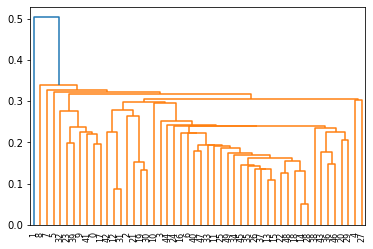

In [25]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(normscaled, method='single'))

#### Building Agglomerative clustering model

In [26]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(normscaled)

#### Get Clusters.labels_

In [27]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [28]:
data_agglo = raw_data.copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.clusters_agglo.value_counts()

1    20
3    12
2    10
0     8
Name: clusters_agglo, dtype: int64

#### Model Evaluation & Visualisation

In [29]:
data_agglo.groupby('clusters_agglo').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters_agglo,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [30]:
#Visualising the data via dimensionality reduction

pca_agg = PCA(n_components=2).fit(normscaled)
pca_2d_agg = pca_agg.transform(normscaled)

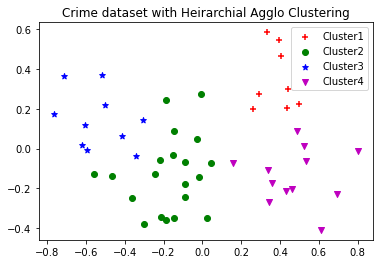

In [31]:
for i in range(0, pca_2d_agg.shape[0]):
    if data_agglo.clusters_agglo[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='r', marker='+')
    elif data_agglo.clusters_agglo[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='g', marker='o')
    elif data_agglo.clusters_agglo[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='b', marker='*')
    elif data_agglo.clusters_agglo[i] == 3:
        c4 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='m', marker='v')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with Heirarchial Agglo Clustering')
pl.show()

## DBSCAN Clustering

#### Fixing the Hyperparameters

- Epsilon value is taken to be 1
- Min pts is 4

#### DBSCAN Model Building

In [32]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(scaled_data)

DBSCAN(eps=1, min_samples=4)

#### Get Clusters.labels_

In [33]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [34]:
data_dbscan = raw_data.copy()
data_dbscan['clusters_dbscan'] = dbscan.labels_
data_dbscan['clusters_dbscan'].value_counts()

 1    28
-1    18
 0     4
Name: clusters_dbscan, dtype: int64

#### Model Evaluation and Visualisation

In [35]:
data_dbscan.groupby('clusters_dbscan').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters_dbscan,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


In [36]:
#Visualising the data via dimensionality reduction

pca_db = PCA(n_components=2).fit(scaled_data)
pca_2d_db = pca_db.transform(scaled_data)

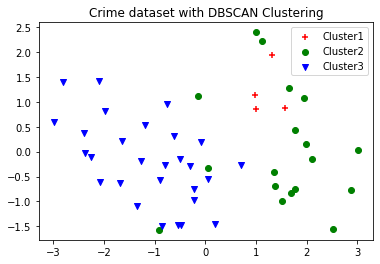

In [37]:
for i in range(0, pca_2d_db.shape[0]):
    if data_dbscan.clusters_dbscan[i] == 0:
        c1 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='r', marker='+')
    elif data_dbscan.clusters_dbscan[i] == -1:
        c2 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='g', marker='o')
    elif data_dbscan.clusters_dbscan[i] == 1:
        c3 = pl.scatter(pca_2d_db[i,0],pca_2d_db[i,1],c='b', marker='v')
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2', 'Cluster3'])
pl.title('Crime dataset with DBSCAN Clustering')
pl.show()
#The number of entries is very poor for good clustering. dencisty of points is high too.

## Conclusion

- The outputs obtained by both k-means clustering and heirarchial clustering are similar with slight variations.
- The clustering in the above two cases seem very apt for the dataset.
- DBSCAN was not able to perform very well since the data points are not very dense(scattered).